In [ ]:
#Loadin Boston Data set-:
#we will be using sklearn -: it is a module which has most of the algos implemented in it
#sklearn also provides sample data set

In [1]:
from sklearn.datasets import load_boston

# Load the Boston dataset
boston = load_boston()
print(boston)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [14]:
from sklearn.datasets import fetch_california_housing    
housing = fetch_california_housing()
x=housing.data
y=housing.target
print(x)
# print("h-:",housing.desc)
print("y",y)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
y [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
type(x)
x.shape

(20640, 8)

In [11]:
#converting the above data into data frame
import pandas as pd
df=pd.DataFrame(x)
cols=['A','B','C','D','E','F','G','H']
df.columns=cols
# print(df.head())
df.describe()
# print(housing)

,A,B,C,D,E,F,G,H
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [21]:
#dividing our data into training and testing using sklearn
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y)
print(y_test.shape)

(5160,)


In [22]:
#applying linear_regression
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(x_train,y_train)

LinearRegression()

In [25]:
Y_pred=alg.predict(x_test)
#compare Y_pred With Y_test

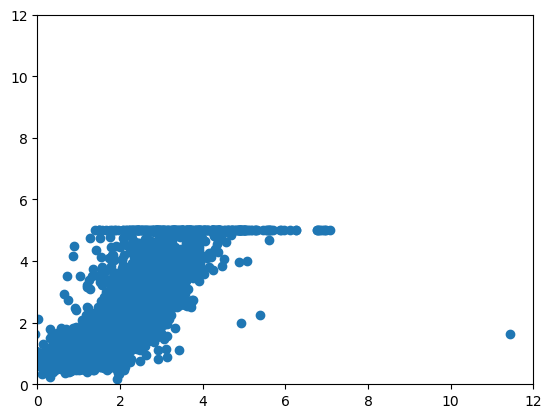

In [27]:
import matplotlib.pyplot as plt
plt.scatter(Y_pred,y_test)
plt.axis([0,12,0,12])
plt.show()